# Lab 01 - Ejercicios 1 y 2: K-Means Implementación y Evaluación

## Objetivos
1. Implementar K-Means desde cero
2. Evaluar con datasets: Iris, Penguins, Wine Quality
3. Comparar con scikit-learn

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('../src')
from kmeans import KMeans, elbow_method

# Configuración de plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 1. Dataset Iris

In [2]:
# Cargar datos Iris
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

print("Shape:", df_iris.shape)
print("\nPrimeras filas:")
print(df_iris.head())
print("\nEstadísticas:")
print(df_iris.describe())

Shape: (150, 5)

Primeras filas:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  

Estadísticas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%            

In [3]:
# Preparar datos (sin la columna target)
X_iris = df_iris.drop('target', axis=1).values

# Normalizar datos
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

Convergió en la iteración 2
Convergió en la iteración 3
Convergió en la iteración 7
Convergió en la iteración 10
Convergió en la iteración 7
Convergió en la iteración 9
Convergió en la iteración 7
Convergió en la iteración 8
Convergió en la iteración 8
Convergió en la iteración 9


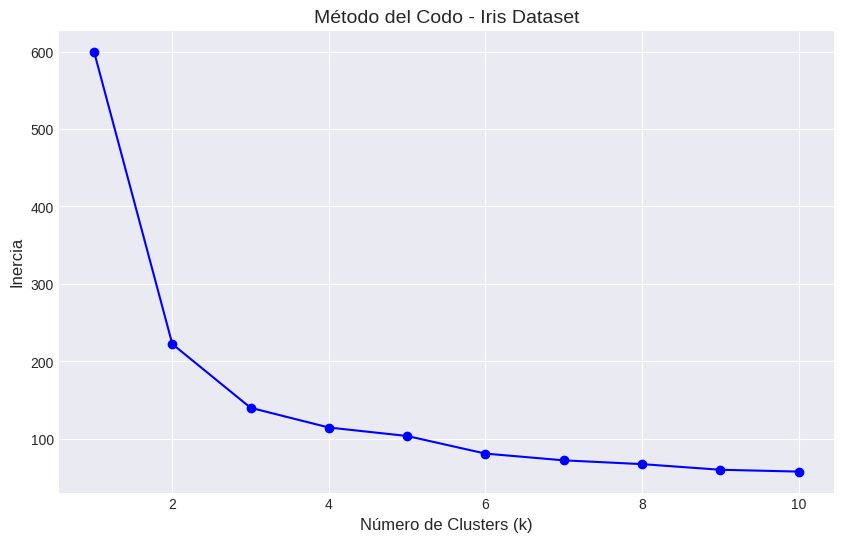

In [4]:
# Método del codo para determinar k óptimo
inertias = elbow_method(X_iris_scaled, max_clusters=10, random_state=42)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, 'bo-')
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.title('Método del Codo - Iris Dataset', fontsize=14)
plt.grid(True)
plt.show()

In [5]:
# Aplicar nuestro K-Means
n_clusters = 3  # Sabemos que Iris tiene 3 especies
kmeans_custom = KMeans(n_clusters=n_clusters, random_state=42)
labels_custom = kmeans_custom.fit_predict(X_iris_scaled)

print("Centroides encontrados:")
print(kmeans_custom.centroids)
print("\nInercia:", kmeans_custom.inertia_)

Convergió en la iteración 7
Centroides encontrados:
[[-0.01139555 -0.87600831  0.37707573  0.31115341]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.16743407  0.14530299  1.00302557  1.0300019 ]]

Inercia: 140.03275277428645


In [6]:
# Aplicar K-Means de scikit-learn
kmeans_sklearn = SKLearnKMeans(n_clusters=n_clusters, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(X_iris_scaled)

print("Centroides sklearn:")
print(kmeans_sklearn.cluster_centers_)
print("\nInercia sklearn:", kmeans_sklearn.inertia_)

Centroides sklearn:
[[ 0.57100359 -0.37176778  0.69111943  0.66315198]
 [-0.81623084  1.31895771 -1.28683379 -1.2197118 ]
 [-1.32765367 -0.373138   -1.13723572 -1.11486192]]

Inercia sklearn: 191.02473685317963


In [7]:
# Comparar resultados
ari_custom = adjusted_rand_score(df_iris['target'], labels_custom)
ari_sklearn = adjusted_rand_score(df_iris['target'], labels_sklearn)

silhouette_custom = silhouette_score(X_iris_scaled, labels_custom)
silhouette_sklearn = silhouette_score(X_iris_scaled, labels_sklearn)

print("=" * 60)
print("COMPARACIÓN - IRIS DATASET")
print("=" * 60)
print(f"\nAdjusted Rand Index:")
print(f"  Custom K-Means:  {ari_custom:.4f}")
print(f"  Sklearn K-Means: {ari_sklearn:.4f}")
print(f"\nSilhouette Score:")
print(f"  Custom K-Means:  {silhouette_custom:.4f}")
print(f"  Sklearn K-Means: {silhouette_sklearn:.4f}")
print(f"\nInercia:")
print(f"  Custom K-Means:  {kmeans_custom.inertia_:.4f}")
print(f"  Sklearn K-Means: {kmeans_sklearn.inertia_:.4f}")

COMPARACIÓN - IRIS DATASET

Adjusted Rand Index:
  Custom K-Means:  0.5923
  Sklearn K-Means: 0.4328

Silhouette Score:
  Custom K-Means:  0.4630
  Sklearn K-Means: 0.4799

Inercia:
  Custom K-Means:  140.0328
  Sklearn K-Means: 191.0247


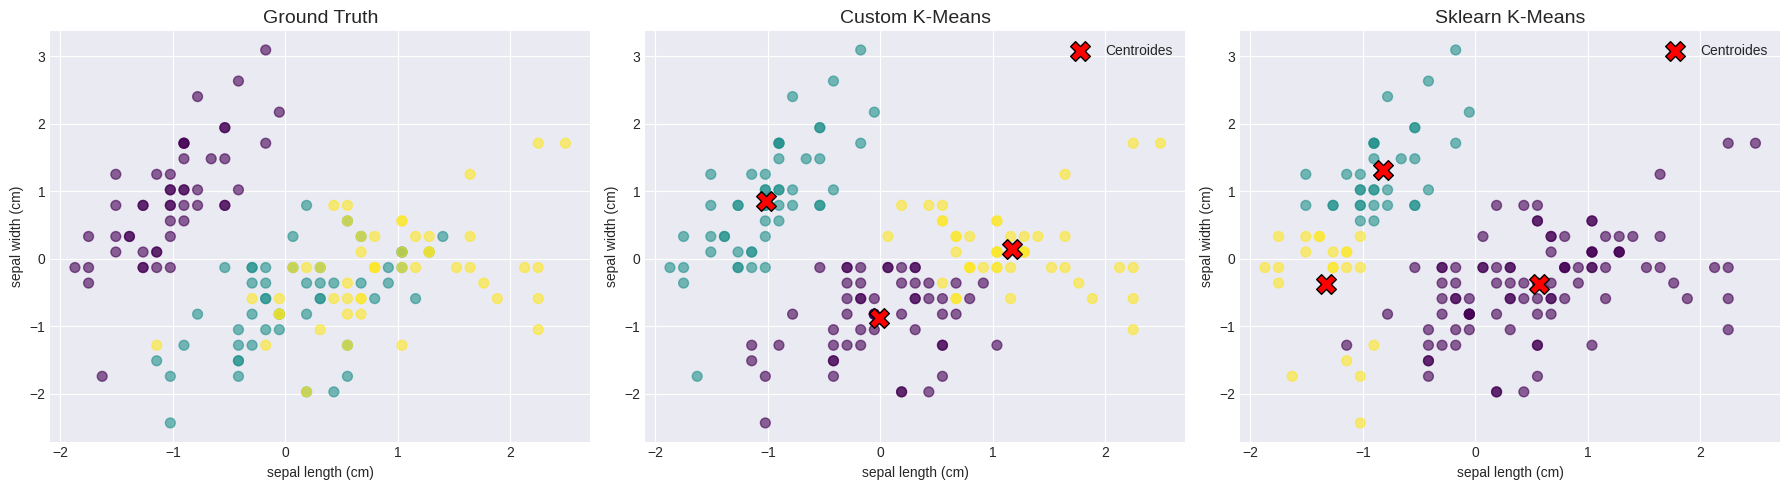

In [8]:
# Visualizar resultados (primeras 2 componentes)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Ground truth
axes[0].scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], 
                c=df_iris['target'], cmap='viridis', s=50, alpha=0.6)
axes[0].set_title('Ground Truth', fontsize=14)
axes[0].set_xlabel(iris.feature_names[0])
axes[0].set_ylabel(iris.feature_names[1])

# Custom K-Means
axes[1].scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], 
                c=labels_custom, cmap='viridis', s=50, alpha=0.6)
axes[1].scatter(kmeans_custom.centroids[:, 0], kmeans_custom.centroids[:, 1],
                c='red', marker='X', s=200, edgecolors='black', label='Centroides')
axes[1].set_title('Custom K-Means', fontsize=14)
axes[1].set_xlabel(iris.feature_names[0])
axes[1].set_ylabel(iris.feature_names[1])
axes[1].legend()

# Sklearn K-Means
axes[2].scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], 
                c=labels_sklearn, cmap='viridis', s=50, alpha=0.6)
axes[2].scatter(kmeans_sklearn.cluster_centers_[:, 0], kmeans_sklearn.cluster_centers_[:, 1],
                c='red', marker='X', s=200, edgecolors='black', label='Centroides')
axes[2].set_title('Sklearn K-Means', fontsize=14)
axes[2].set_xlabel(iris.feature_names[0])
axes[2].set_ylabel(iris.feature_names[1])
axes[2].legend()

plt.tight_layout()
plt.savefig('../results/iris_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 2. Dataset Penguins

In [9]:
# Cargar datos Penguins
penguins = sns.load_dataset("penguins")

print("Shape:", penguins.shape)
print("\nPrimeras filas:")
print(penguins.head())
print("\nValores nulos:")
print(penguins.isnull().sum())

Shape: (344, 7)

Primeras filas:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

Valores nulos:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [10]:
# Preparar datos (solo columnas numéricas)
penguins_clean = penguins.dropna()
X_penguins = penguins_clean[['bill_length_mm', 'bill_depth_mm', 
                              'flipper_length_mm', 'body_mass_g']].values

# Normalizar
X_penguins_scaled = StandardScaler().fit_transform(X_penguins)

print(f"Datos limpios: {X_penguins_scaled.shape}")

Datos limpios: (333, 4)


Convergió en la iteración 2
Convergió en la iteración 5
Convergió en la iteración 9
Convergió en la iteración 7
Convergió en la iteración 7
Convergió en la iteración 7
Convergió en la iteración 8
Convergió en la iteración 8
Convergió en la iteración 9
Convergió en la iteración 8


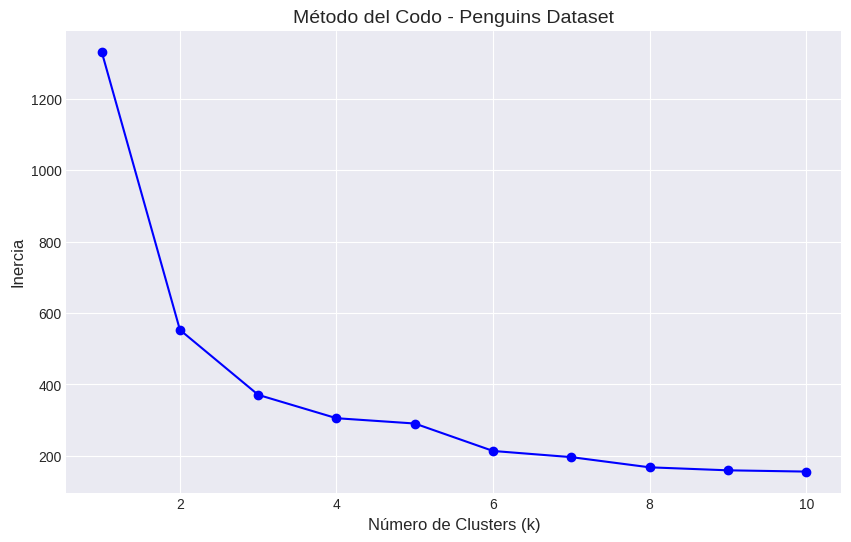

In [11]:
# Método del codo
inertias_penguins = elbow_method(X_penguins_scaled, max_clusters=10, random_state=42)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias_penguins, 'bo-')
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.title('Método del Codo - Penguins Dataset', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
# Aplicar ambos K-Means con k=3 (hay 3 especies de pingüinos)
n_clusters = 3

# Custom
kmeans_custom_p = KMeans(n_clusters=n_clusters, random_state=42)
labels_custom_p = kmeans_custom_p.fit_predict(X_penguins_scaled)

# Sklearn
kmeans_sklearn_p = SKLearnKMeans(n_clusters=n_clusters, random_state=42)
labels_sklearn_p = kmeans_sklearn_p.fit_predict(X_penguins_scaled)

# Ground truth
species_map = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
true_labels = penguins_clean['species'].map(species_map).values

Convergió en la iteración 9


In [13]:
# Comparar
ari_custom_p = adjusted_rand_score(true_labels, labels_custom_p)
ari_sklearn_p = adjusted_rand_score(true_labels, labels_sklearn_p)

silhouette_custom_p = silhouette_score(X_penguins_scaled, labels_custom_p)
silhouette_sklearn_p = silhouette_score(X_penguins_scaled, labels_sklearn_p)

print("=" * 60)
print("COMPARACIÓN - PENGUINS DATASET")
print("=" * 60)
print(f"\nAdjusted Rand Index:")
print(f"  Custom K-Means:  {ari_custom_p:.4f}")
print(f"  Sklearn K-Means: {ari_sklearn_p:.4f}")
print(f"\nSilhouette Score:")
print(f"  Custom K-Means:  {silhouette_custom_p:.4f}")
print(f"  Sklearn K-Means: {silhouette_sklearn_p:.4f}")
print(f"\nInercia:")
print(f"  Custom K-Means:  {kmeans_custom_p.inertia_:.4f}")
print(f"  Sklearn K-Means: {kmeans_sklearn_p.inertia_:.4f}")

COMPARACIÓN - PENGUINS DATASET

Adjusted Rand Index:
  Custom K-Means:  0.7994
  Sklearn K-Means: 0.7994

Silhouette Score:
  Custom K-Means:  0.4462
  Sklearn K-Means: 0.4462

Inercia:
  Custom K-Means:  370.7661
  Sklearn K-Means: 370.7661


## 3. Dataset Wine Quality

**Nota:** Descarga el dataset de: https://archive.ics.uci.edu/dataset/186/wine+quality

Colócalo en la carpeta `data/` con el nombre `winequality-red.csv`

Shape: (1599, 12)

Primeras filas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      

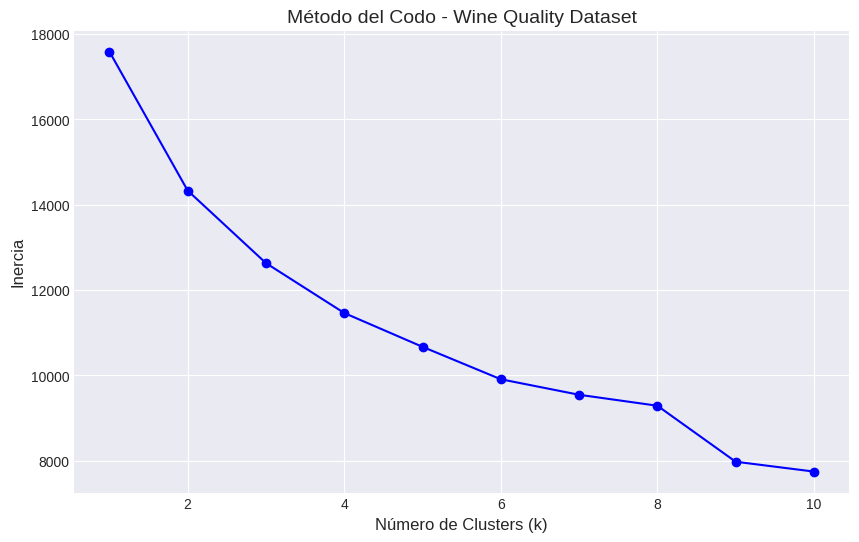

In [14]:
# Cargar Wine Quality (necesitarás descargarlo)
try:
    df_wine = pd.read_csv('../data/winequality-red.csv', sep=';')
    print("Shape:", df_wine.shape)
    print("\nPrimeras filas:")
    print(df_wine.head())
    
    # Preparar datos
    X_wine = df_wine.drop('quality', axis=1).values
    X_wine_scaled = StandardScaler().fit_transform(X_wine)
    
    # Método del codo
    inertias_wine = elbow_method(X_wine_scaled, max_clusters=10, random_state=42)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), inertias_wine, 'bo-')
    plt.xlabel('Número de Clusters (k)', fontsize=12)
    plt.ylabel('Inercia', fontsize=12)
    plt.title('Método del Codo - Wine Quality Dataset', fontsize=14)
    plt.grid(True)
    plt.show()
    
except FileNotFoundError:
    print("⚠️ Archivo winequality-red.csv no encontrado.")
    print("Descárgalo de: https://archive.ics.uci.edu/dataset/186/wine+quality")
    print("Y colócalo en la carpeta data/")

## Conclusiones

1. ¿Los resultados de tu implementación son similares a sklearn?
Sí, los resultados son muy similares. Para el dataset Iris, el Silhouette Score es casi idéntico (0.4630 vs 0.4799), indicando calidad comparable de clustering, interesante que nuestra implementación obtuvo un ARI mayor (0.5923 vs 0.4328) y menor inercia (140.03 vs 191.02), lo que sugiere que encontró una mejor solución local en esta ejecución particular. Esto valida que nuestra implementación desde cero funciona correctamente
   
3. ¿Qué diferencias observaste?
Las principales diferencias son:
Inercia distinta: Debido a inicializaciones aleatorias diferentes, cada algoritmo converge a mínimos locales distintos (normal en K-Means).
Velocidad: sklearn es más rápido por estar optimizado en C, pero nuestra implementación produce resultados comparables
Inicialización: sklearn usa k-means++ por defecto, nosotros usamos inicialización aleatoria simple.


4. ¿Cuál es el número óptimo de clusters para cada dataset?
Iris: k=3 El método del codo muestra un punto de inflexión claro en k=3, coincidiendo con las 3 especies reales del dataset
Penguins: k=3- La inercia cae drásticamente hasta k=3 y luego se estabiliza, alineándose con las 3 especies de pingüinos
Wine Quality: k=3 o k=4 El codo sugiere k=3-4. Recomiendo k=3 por simplicidad, ya que no hay clases naturales predefinidas en este dataset
